In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [4]:
# https://www.kaggle.com/mlg-ulb/creditcardfraud
df = pd.read_csv('creditcard.csv')
df.head(2)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  

[2 rows x 31 columns]

In [6]:
# df.info()

In [8]:
X = df.iloc[:, 0:-1]
y = df.Class

In [13]:
# class imbalance
y.sum() / y.shape[0]

0.001727485630620034

In [21]:
df.describe().T[['min', 'max']]

min            max
Time      0.000000  172792.000000
V1      -56.407510       2.454930
V2      -72.715728      22.057729
V3      -48.325589       9.382558
V4       -5.683171      16.875344
V5     -113.743307      34.801666
V6      -26.160506      73.301626
V7      -43.557242     120.589494
V8      -73.216718      20.007208
V9      -13.434066      15.594995
V10     -24.588262      23.745136
V11      -4.797473      12.018913
V12     -18.683715       7.848392
V13      -5.791881       7.126883
V14     -19.214325      10.526766
V15      -4.498945       8.877742
V16     -14.129855      17.315112
V17     -25.162799       9.253526
V18      -9.498746       5.041069
V19      -7.213527       5.591971
V20     -54.497720      39.420904
V21     -34.830382      27.202839
V22     -10.933144      10.503090
V23     -44.807735      22.528412
V24      -2.836627       4.584549
V25     -10.295397       7.519589
V26      -2.604551       3.517346
V27     -22.565679      31.612198
V28     -15.430084      33.847808
Amount    0.000000   25691.160000
Class     0.000000       1.000000

In [128]:
X_scaled = StandardScaler().fit_transform(X)

In [139]:
iso = IsolationForest(behaviour='new', contamination=.002, n_jobs=-1, max_features=20, n_estimators=250).fit(X_scaled)
iso

IsolationForest(behaviour='new', bootstrap=False, contamination=0.002,
                max_features=20, max_samples='auto', n_estimators=250,
                n_jobs=-1, random_state=None, verbose=0, warm_start=False)

In [140]:
yhat = iso.predict(X)

In [141]:
y.shape

(284807,)

In [142]:
np.argwhere(yhat == -1).shape

(691, 1)

In [143]:
y[np.argwhere(yhat == -1).flatten()].sum()

177

In [144]:
177 / 691

0.25615050651230103

(0, 1000)

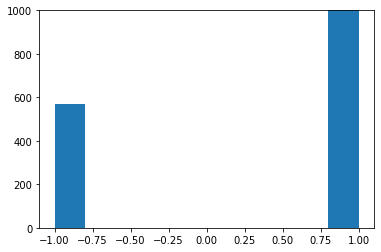

In [102]:
plt.hist(yhat)
plt.ylim(0, 1000)